## UCI SECOM Dataset
### Semiconductor manufacturing process dataset

##### Manufacturing process feature selection and categorization
What we will do in this notebook? 
#### In this Notebook we will do the training and testing pipeline. Later we will make a pipeline with .py depending on each step

##### Our goal is to correctly classify input signals to pass or fail. We specifically going to create a classifier and test it.

data source: https://www.kaggle.com/datasets/paresh2047/uci-semcom?resource=download

1) Imports

In [3]:
# Libraries

import numpy as np
import pandas as pd


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling libraries
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


In [4]:
# Data 

df = pd.read_parquet('.\\data\\uci-secom.parquet')

## 1) Data understanding

In [5]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [7]:
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

It appears that there are 104 fail instances and 1463 pass instances. (Pretty imbalanced)

Imbalanced not only in the target data column but also regading the number of features. 

Take a look:

In [8]:
len(df.columns)

592

There are in total 591 features (sensors)  (592 minus the pass/fail column)

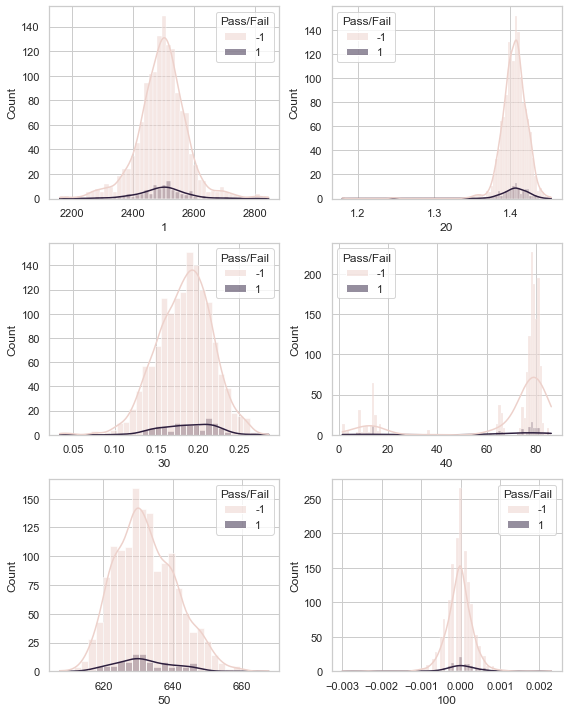

In [9]:
# lets plot some of the features

sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=df, x='1', kde=True,hue='Pass/Fail', ax=axs[0, 0])
sns.histplot(data=df, x='20', kde=True,hue='Pass/Fail', ax=axs[0, 1])
sns.histplot(data=df, x='30', kde=True,hue='Pass/Fail', ax=axs[1, 0])
sns.histplot(data=df, x='40', kde=True,hue='Pass/Fail', ax=axs[1, 1])
sns.histplot(data=df, x='50', kde=True,hue='Pass/Fail', ax=axs[2, 0])
sns.histplot(data=df, x='100', kde=True,hue='Pass/Fail', ax=axs[2, 1])
fig.tight_layout()


In [10]:
# In this random sample 5 are very close to a normal distirbution while one has some outliers. 

# Also the fails are not in the outliers of the feature 40. (We are not lucky or this problem obviously is not that straightforward)

## 2) Data processing

In [11]:
100*df.isnull().sum().sum()/(df.shape[0]*df.shape[1]) #percentage of missing values

4.522219251798065

In [12]:
#find correlations


In [13]:
#under sample data

# class count
class_count_0, class_count_1 = df['Pass/Fail'].value_counts()

# Separate class
class_0 = df[df['Pass/Fail'] == -1]
class_1 = df[df['Pass/Fail'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)


class 0: (1463, 592)
class 1: (104, 592)


total class of 1 and 0: -1    416
 1    104
Name: Pass/Fail, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

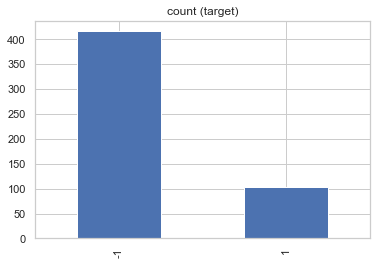

In [14]:
class_0_under = class_0.sample(class_count_1*4)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Pass/Fail'].value_counts())# plot the count after under-sampeling
test_under['Pass/Fail'].value_counts().plot(kind='bar', title='count (target)')

In [15]:
#split data

#first reduce data positives
X = test_under.drop(['Pass/Fail','Time'], axis=1)
y = test_under['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.15)

In [16]:
y_train.value_counts()

-1    354
 1     88
Name: Pass/Fail, dtype: int64

In [17]:
y_test.value_counts()

-1    62
 1    16
Name: Pass/Fail, dtype: int64

In [18]:
# cleaning method mean


imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(X_train) #need to save this for later

#transform data  (fill nans)
X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)


In [19]:
# scale data

# Standardizing the features
sc = StandardScaler().fit(X_train)

#transform data  (scale data)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [20]:
#Use PCA

pca = PCA(n_components=15)
pca_tr = pca.fit(X_train)

#transform data  (PCA)
X_train = pca_tr.transform(X_train)
X_test = pca_tr.transform(X_test)

X_train = pd.DataFrame(data = X_train)
X_test = pd.DataFrame(data = X_test)

## 3) Training and testing

In [85]:
# Random forest
clf = RandomForestClassifier(max_depth=19,random_state=0,class_weight={-1:1,1:8})
clf.fit(X_train, y_train)

# test
y_pred = clf.predict(X_test)

# compute accuracy of the model
clf.score(X_test, y_test)

0.8076923076923077

In [22]:
#XGBoost

from xgboost import XGBClassifier as xgb_classifier
from sklearn.utils.class_weight import compute_sample_weight
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)

xgb_classifier.fit(X=X_train, y=y_train, sample_weight=sample_weights)

# test
y_pred = xgb_classifier.predict(X_test)

# compute accuracy of the model
xgb_classifier.score(X_test, y_test)

TypeError: fit() missing 1 required positional argument: 'y'

In [86]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)

c:\Users\AX-St\Anaconda3\envs\exp-tracking-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


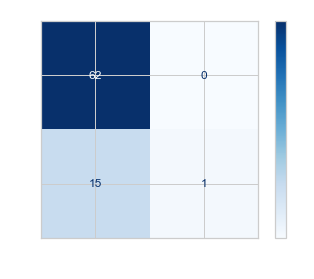

In [87]:
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [54]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.83      1.00      0.91        62
           1       1.00      0.19      0.32        16

    accuracy                           0.83        78
   macro avg       0.91      0.59      0.61        78
weighted avg       0.86      0.83      0.78        78

